In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eda_df = pd.read_csv('eda.csv', index_col=0)

In [3]:
eda_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Level,Year_Joined,Month_Joined,Day_Joined,Years_Customer,Days_Customer,Age_Group,Time,Dt_year,Period
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,Graduate,2012,April,Monday,2,971 days,Middel Aged,2012-04-09,2012,3751
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,Graduate,2014,August,Sunday,0,125 days,Middel Aged,2014-08-03,2014,2905
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,Graduate,2013,August,Wednesday,1,472 days,Middel Aged,2013-08-21,2013,3252
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,Graduate,2014,October,Thursday,0,65 days,Adult,2014-10-02,2014,2845
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,Postgraduate,2014,January,Sunday,0,321 days,Adult,2014-01-19,2014,3101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,Graduate,2013,June,Thursday,1,541 days,Middel Aged,2013-06-13,2013,3321
2201,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,Postgraduate,2014,October,Monday,0,61 days,Senior Citizen,2014-10-06,2014,2841
2202,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,Graduate,2014,January,Saturday,0,315 days,Adult,2014-01-25,2014,3095
2203,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,...,Postgraduate,2014,January,Friday,0,316 days,Middel Aged,2014-01-24,2014,3096


In [79]:
eda_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'TotalMntSpent', 'TotalNumPurchases', 'Total_Acc_Cmp', 'Partner',
       'Children', 'Family_Size', 'Is_Parent', 'Education_Level',
       'Year_Joined', 'Month_Joined', 'Day_Joined', 'Years_Customer',
       'Days_Customer', 'Age_Group', 'Time', 'Dt_year', 'Period'],
      dtype='object')

## 1. 변수 정리

In [4]:
eda_df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Z_CostContact', 'Z_Revenue', 'Time', 'Dt_year', 'Dt_Customer'], 
            axis=1, inplace=True)

In [5]:
# 'Income' int 타입으로 변경
eda_df['Income'] = eda_df['Income'].astype('int')

In [6]:
# 결혼상태에 따른 파트너 유무
eda_df["Partner"] = eda_df["Partner"].replace({"Yes":1, "No": 0})

In [7]:
# 교육 수준(Undergraduate, Graduate, Postgraduate) 3그룹 -> 더미변수 변환
pd.get_dummies(eda_df, columns = ['Education_Level'])

# 기존에 있던 'Education_Level' 삭제
eda_df.drop(['Education_Level'], axis=1, inplace=True)

In [8]:
# 'Month_Joined' ,'Day_Joined' (고객이 등록한 달, 요일 삭제)
eda_df.drop(['Month_Joined', 'Day_Joined'], axis=1, inplace=True)

# 'Days_Customer' (고객 가입 일수)
eda_df['Days_Customer'] = eda_df['Days_Customer'].str.replace(' days', repl=r'', regex=True)
eda_df['Days_Customer'] = eda_df['Days_Customer'].astype(int)

In [9]:
# 'Age_Group', 'Period' 삭제
eda_df.drop(['Age_Group', 'Period'], axis=1, inplace=True)

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
eda_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Family_Size,Is_Parent,Year_Joined,Years_Customer,Days_Customer
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,25,1,0,0,1,0,2012,2,971
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,6,0,0,2,3,1,2014,0,125
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,21,0,1,0,2,0,2013,1,472
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,8,0,1,1,3,1,2014,0,65
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,19,0,1,1,3,1,2014,0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1341,18,0,1,1,3,1,2013,1,541
2201,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,444,22,1,1,3,5,1,2014,0,61
2202,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,1241,19,1,0,0,1,0,2014,0,315
2203,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,843,23,0,1,1,3,1,2014,0,316


In [89]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2204
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Income               2205 non-null   int32
 1   Kidhome              2205 non-null   int64
 2   Teenhome             2205 non-null   int64
 3   Recency              2205 non-null   int64
 4   MntWines             2205 non-null   int64
 5   MntFruits            2205 non-null   int64
 6   MntMeatProducts      2205 non-null   int64
 7   MntFishProducts      2205 non-null   int64
 8   MntSweetProducts     2205 non-null   int64
 9   MntGoldProds         2205 non-null   int64
 10  NumDealsPurchases    2205 non-null   int64
 11  NumWebPurchases      2205 non-null   int64
 12  NumCatalogPurchases  2205 non-null   int64
 13  NumStorePurchases    2205 non-null   int64
 14  NumWebVisitsMonth    2205 non-null   int64
 15  AcceptedCmp3         2205 non-null   int64
 16  AcceptedCmp4         220

#### 1. People
- Income: Customer's yearly household income : 가구 소득
- Kidhome: Number of children in customer's household : 자녀 수
- Teenhome: Number of teenagers in customer's household : 청소년 자녀 수
- Recency: Number of days since customer's last purchase : 고객의 마지막 구매 이후 일 수
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise : 지난 2년간 고객의 컴플레인 여부(한 경우 1, 아니면 0)

#### 2. Products
- MntWines: Amount spent on wine in last 2 years : 지난 2년 와인 지출 비용
- MntFruits: Amount spent on fruits in last 2 years : 지난 2년 과일 지출 비용
- MntMeatProducts: Amount spent on meat in last 2 years : 지난 2년 육류 지출 비용
- MntFishProducts: Amount spent on fish in last 2 years : 지난 2년 생선류 지출 비용
- MntSweetProducts: Amount spent on sweets in last 2 years : 지난 2년 간식 지출 비용
- MntGoldProds: Amount spent on gold in last 2 years : 지난 2년간 금 지출 비용
        
#### 3. Promotion
- NumDealsPurchases: Number of purchases made with a discount : 할인일 때 구매한 횟수
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise : 첫 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise : 두 번재 캠페인에서 제안 수락한 경우 1, 그 외 0
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise : 세 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise : 네 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise : 다섯 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise : 마지막 캠페인에서 제안 수락한 경우 1, 그 외 0

#### 4. Place
- NumWebPurchases: Number of purchases made through the company’s website : 웹사이트를 통해 구매한 횟수
- NumCatalogPurchases: Number of purchases made using a catalogue : 카탈로그를 통해 구매한 횟수
- NumStorePurchases: Number of purchases made directly in stores : 가게에서 구매한 횟수
- NumWebVisitsMonth: Number of visits to company’s website in the last month : 지난 달 웹사이트를 방문수

## 2. PCA (주성분분석) > 차원축소

### 2-1. 표준화

In [12]:
from sklearn.preprocessing import StandardScaler

x = eda_df.values
x = StandardScaler().fit_transform(x)

data = pd.DataFrame(x, columns=eda_df.columns)
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Family_Size,Is_Parent,Year_Joined,Years_Customer,Days_Customer
0,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,2.370996,1.017189,1.679323,1.328161,0.614920,-1.347625,-1.266589,-1.759012,-1.58466,-1.498307,1.498307,1.974128
1,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,1.273530,-0.963897,-1.167390,-0.503808,-1.347625,1.403420,0.448513,0.63105,1.417639,-1.417639,-1.664957
2,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,0.333612,0.281242,0.802782,-0.503808,0.742046,-1.266589,-0.655250,-1.58466,-0.040334,0.040334,-0.172330
3,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.289883,-0.920675,-0.904700,-0.503808,0.742046,0.068415,0.448513,0.63105,1.417639,-1.417639,-1.923048
4,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.033542,-0.307248,0.540092,-0.503808,0.742046,0.068415,0.448513,0.63105,1.417639,-1.417639,-0.821859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.463624,-0.823405,0.906602,-0.104028,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,-0.168834,1.790162,0.126750,-0.562650,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,0.162718,1.220500,0.408747,-0.503808,0.742046,0.068415,0.448513,0.63105,-0.040334,0.040334,0.124475
2201,0.598401,2.900920,0.906602,0.241687,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,2.482731,1.424772,-0.230646,-0.254109,0.689203,-0.282531,-0.283466,-0.280655,3.811584,-0.117444,-0.095673,-0.421764,1.957107,-0.270675,0.934126,0.614920,0.742046,2.738424,2.656038,0.63105,1.417639,-1.417639,-1.940254
2202,0.258780,-0.823405,-0.930767,1.451690,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-0.699147,-0.767567,0.126750,2.214218,0.274779,-0.282531,3.527764,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.033542,1.054260,0.540092,0.614920,-1.347625,-1.266589,-1.759012,-1.58466,1.417639,-1.417639,-0.847668
2203,0.851004,-0.823405,0.906602,-1.417746,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,-0.168834,0.693992,0.841543,1.288596,-0.968493,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,1.102636,0.392623,1.065471,-0.503808,0.742046,0.068415,0.448513,0.63105,1.417639,-1.417639,-0.843367


In [13]:
data.shape

(2205, 33)

### 2-2. PCA

- https://m.blog.naver.com/tjdrud1323/221720259834
- https://techblog-history-younghunjo1.tistory.com/134

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

In [15]:
principalDf.head()

,principal component1,principal component2
0,5.301820,1.678688
1,-3.343682,-1.704154
2,2.308156,-0.673919
3,-3.145659,-2.535017
4,-0.792385,-0.745759


In [16]:
sum(pca.explained_variance_ratio_)

0.4023431997535733

-> 두 개의 주성분이 전체 분산의 약 40%를 설명한다. 

In [17]:
# 모든 독립변수 개수(33개)만큼 주성분 개수 설정해서 분석

from sklearn.decomposition import PCA

pca = PCA(n_components=33)
pca_array = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_array, index=data.index)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,5.301820,1.678689,2.670582,-1.705473,-0.035152,1.645357,-0.393993,0.577855,0.126872,-0.805554,-0.263748,1.370735,1.791141,0.848479,0.911668,0.146740,-0.041061,-1.068065,-0.065291,1.427867,0.318344,0.415273,0.933273,0.074718,-0.488357,0.184069,0.333856,-3.429619e-14,1.682222e-15,1.442619e-15,1.761660e-15,1.110750e-15,-2.904029e-15
1,-3.343682,-1.704156,-1.907772,0.917760,0.689551,0.912216,-0.878385,0.838859,0.510707,-1.302294,0.211465,0.099053,0.372095,-0.251953,0.151081,-0.054793,0.589295,0.014665,0.067719,0.146353,-0.179741,0.137838,0.021021,-0.076726,-0.202031,-0.133122,-0.184264,1.067799e-14,-9.029357e-15,5.459091e-16,-1.682559e-15,8.160978e-15,1.009498e-15
2,2.308156,-0.673917,-0.365643,-1.619309,0.439942,-0.224895,-0.209522,-1.606519,0.028578,0.965026,-0.121451,0.277756,0.073676,0.333154,-0.366847,0.334389,0.400051,-0.504066,0.220954,-1.046049,1.138455,0.339057,-0.562909,-0.412789,-0.560058,-0.238678,-0.209396,5.344220e-15,1.484535e-14,4.739407e-16,-4.967132e-15,-1.067745e-15,1.264400e-15
3,-3.145659,-2.535017,-0.756687,0.471332,-0.939053,0.000438,1.053577,-1.209669,0.528654,0.474900,0.022215,-0.072295,0.038555,-0.062053,-0.026772,-0.028153,0.037267,-0.076232,0.043217,-0.022539,0.067124,-0.202012,0.233473,0.049246,0.334581,0.227397,-0.485046,1.029280e-16,-8.003558e-16,-1.048207e-15,-7.158711e-16,-4.945069e-16,1.890754e-16
4,-0.792385,-0.745757,-1.811022,-0.092278,-1.236420,-0.131730,2.398488,0.369471,-0.119091,0.518701,-0.446106,0.199119,1.065789,0.419416,-0.000849,0.024184,-0.579991,0.087998,-0.074273,-0.396823,0.193412,0.441310,0.371972,-0.436732,0.375903,-0.532537,0.428509,-2.655099e-14,2.533159e-16,-1.914342e-15,6.040841e-16,9.109759e-16,2.884387e-15


In [18]:
# 주성분의 설명력과 기여율

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_})
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
0,9.709867e+00,2.941050e-01,0.294105
1,3.573483e+00,1.082382e-01,0.402343
2,2.836009e+00,8.590070e-02,0.488244
3,2.583825e+00,7.826222e-02,0.566506
4,1.406180e+00,4.259218e-02,0.609098
5,1.340090e+00,4.059036e-02,0.649689
6,1.085203e+00,3.287002e-02,0.682559
7,1.030704e+00,3.121928e-02,0.713778
8,9.986129e-01,3.024727e-02,0.744025
9,9.809626e-01,2.971266e-02,0.773738


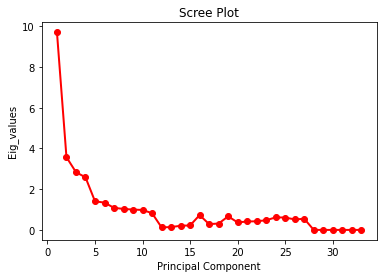

In [19]:
from sklearn.preprocessing import StandardScaler

x = eda_df.values
X_std_train = StandardScaler().fit_transform(x)
mean_vec_train = np.mean(X_std_train, axis = 0)
cov_mat_train = (X_std_train - mean_vec_train).T.dot((X_std_train - mean_vec_train))/(X_std_train.shape[0]-1)

cov_mat_train = np.cov(X_std_train.T)
eig_vals_train, eig_vecs_train = np.linalg.eig(cov_mat_train)

sing_vals = np.arange(len(eig_vals_train))+1
plt.plot(sing_vals, eig_vals_train, "ro-", linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eig_values")
plt.show()

-> 4개인 지점을 기점으로 kink (꺾인 부분)가 발생함. 차원의 수를 4개로 축소.

screeplot : http://thoughtschangeworld.blogspot.com/2018/04/nba-stat-pt3-classification-pca.html

In [20]:
pca = PCA(n_components=4)

printcipalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=printcipalComponents)

sum(pca.explained_variance_ratio_)

0.9999789745508337

-> 4개의 주성분이 전체 분산의 약 99%를 설명한다. 

In [21]:
principalDf

,0,1,2,3
0,6544.496726,1008.859270,-215.280799,259.794644
1,-5294.628049,-600.453956,256.221646,-38.082954
2,19988.491359,-359.491297,-61.117214,-93.836212
3,-24984.238773,-58.537172,456.013128,-6.618433
4,6662.029701,-448.408552,88.843526,7.815265
...,...,...,...,...
2200,9619.998638,550.737082,77.086543,-130.340364
2201,12383.409827,-559.941917,306.985330,-252.511181
2202,5379.595362,621.652391,323.185573,-302.707301
2203,17623.699033,-256.085521,130.827161,-41.622530


## 3. K-means

최적의 k값을 설정하는 방법
1. Elbow method
2. Silhouette method

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

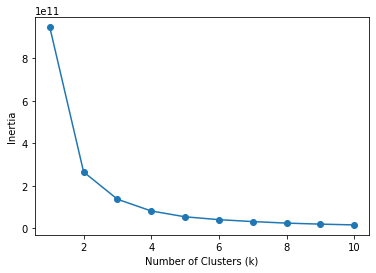

In [23]:
num_clusters = list(range(1, 11))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(principalDf)
    inertias.append(model.inertia_)
    
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### 3-1. Elbow method (KElbowVisualizer)

https://eunsukimme.github.io/ml/2019/12/16/K-Means/

In [24]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

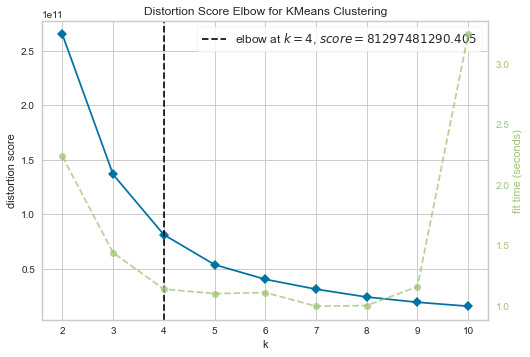

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(principalDf)
elbow_method.show()

### 3-2. Silhouette method

- 실루엣 값은 개체가 다른 클러스터(seperation)에 비해 자신의 클러스터(cohesion)와 얼마나 유사한지 측정함.
- 실루엣 범위는 -1에서 +1까지이며, 값이 높으면 객체가 자체 클러스터와 잘 일치하고 인접 클러스터와 잘 일치하지 않음.
- 대부분의 개체에 높은 값이 있으면 클러스터링 구성이 적합함.
- 많은 포인트의 값이 낮거나 음수이면 클러스터링 구성에 클러스터가 너무 많거나 적을 수 있음.

- https://nicola-ml.tistory.com/66
- https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

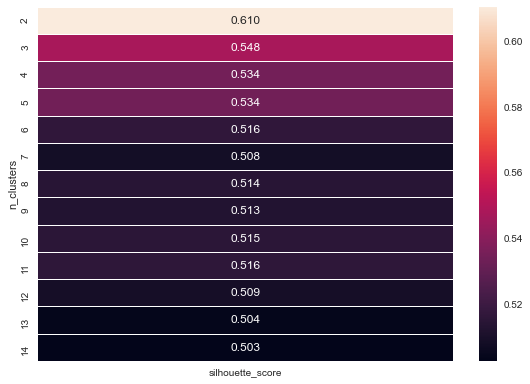

In [28]:
visualize_silhouette_layer(principalDf)

-> 가장 높은 실루엣값이 있는 0.610에 매핑되는 클러스터 K=2이 적정하다는 것을 보여줌 (???)

- https://studying-haeung.tistory.com/13
- https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/
- https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feat

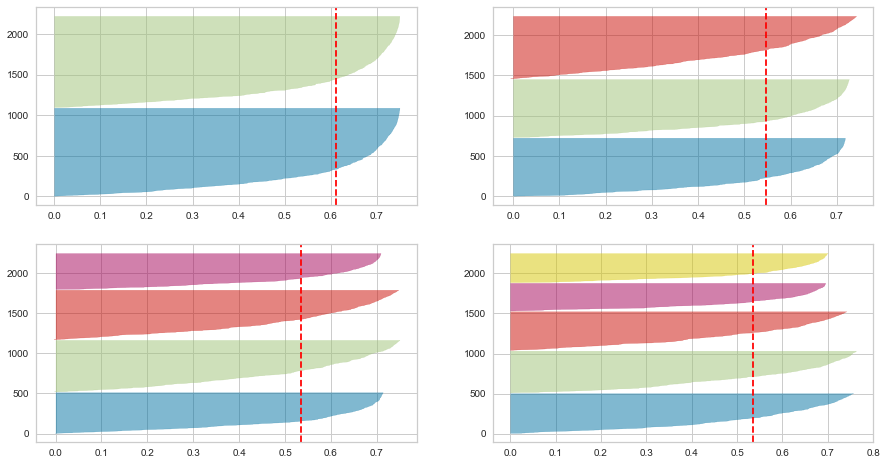

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(principalDf)

-> k=2일 때 전체 데이터의 실루엣 계수 평균이 가장 높음

In [53]:
# k=5인 KMeans 모델 생성 후 실루엣 계수 시각화 
result_df = principalDf.copy()

#클러스터ID 컬럼 생성 
result_df.loc[:,'clusterID'] = visualizer.predict(principalDf)

#실루엣 계수 컬럼 생성
result_df.loc[:,'silhouette coefficient'] = visualizer.silhouette_samples_

result_df.shape
result_df.head(5)

c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,3,cluster,clusterID,silhouette coefficient
0,6544.496726,1008.859270,-215.280799,259.794644,-1,2,0.186889
1,-5294.628049,-600.453956,256.221646,-38.082954,-1,2,0.421622
2,19988.491359,-359.491297,-61.117214,-93.836212,-1,0,0.481819
3,-24984.238773,-58.537172,456.013128,-6.618433,-1,3,0.376700
4,6662.029701,-448.408552,88.843526,7.815265,-1,2,0.178725


In [55]:
print('전체 데이터의 실루엣 계수 평균')
print(result_df['silhouette coefficient'].mean())

print('\n군집별 실루엣 계수 평균')
result_df.groupby('clusterID')['silhouette coefficient'].mean().reset_index()

전체 데이터의 실루엣 계수 평균
0.5342422111579249

군집별 실루엣 계수 평균


,clusterID,silhouette coefficient
0,0,0.537133
1,1,0.547349
2,2,0.501679
3,3,0.539554
4,4,0.549721


## 4. DBScan

- https://tobigs.gitbook.io/tobigs/data-analysis/undefined-3/python-2-2
- https://jimmy-ai.tistory.com/138

In [30]:
from sklearn.cluster import DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=2)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(principalDf)
principalDf['cluster'] = model.fit_predict(principalDf)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'Annual Income (k$)'], 
                df_scale.loc[df_scale['cluster'] == i, 'Spending Score (1-100)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

## 5. Hierarchical agglomerative clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, ward

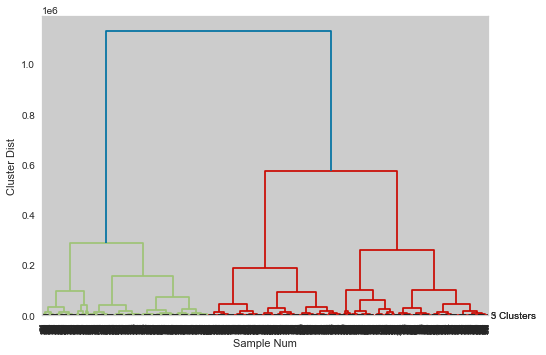

In [39]:
linkage_array = ward(principalDf)
dendrogram(linkage_array)
plt.xlabel("Sample Num")
plt.ylabel("Cluster Dist")

# 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [350, 350], '--', c='k')
ax.plot(bounds, [200, 200], '--', c='k')
ax.text(bounds[1], 350, ' 3 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 200, ' 5 Clusters ', va='center', fontdict={'size': 10})
plt.show()

## 6. Affinity Propagation

In [41]:
from sklearn.cluster import AffinityPropagation

In [ ]:
ap = AffinityPropagation()
cluster = ap.fit(principalDf)
cluster_id = pd.DataFrame(cluster.labels_)

d5 = pd.DataFrame()
d5 = pd.concat([principalDf,cluster_id],axis=1)
d5.columns = [0, 1, "cluster"]

sns.scatterplot(d5[0], d5[1], hue = d5['cluster'], legend="full")
plt.title('Affinity Propagation {} clusters'.format(len(d5.cluster.unique())))
plt.show()

print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d5.iloc[:,:-1], d5['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d5.iloc[:,:-1], d5['cluster'])))

## 7. Mean Shift

In [45]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
n = [10, 50, 100]    
for i in n:
    bandwidth = estimate_bandwidth(principalDf, quantile=0.2, n_samples=i)
    ms = MeanShift(bandwidth=bandwidth)
    cluster = ms.fit(principalDf)
    cluster_id = pd.DataFrame(cluster.labels_)

    d6 = pd.DataFrame()
    d6 = pd.concat([principalDf,cluster_id],axis=1)
    d6.columns = [0, 1, "cluster"]

    sns.scatterplot(d6[0], d6[1], hue = d6['cluster'], legend="full")
    plt.title('Mean Shift with {} samples'.format(i))
    plt.show()

    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d6.iloc[:,:-1], d6['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d6.iloc[:,:-1], d6['cluster'])))